## Description of the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

## Import Dataset

In [2]:
with open('spambase.names','r') as f:
    line = f.readline()
    while 'word_freq_make' not in line : line = f.readline()
    column_names = []
    while(line): 
        column_names.append(line.split(':')[0])
        line = f.readline()
    f.close()
column_names.append('spam')

In [3]:
df = pd.read_csv('spambase.data', names=column_names)

In [4]:
df.head(57)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


## Analysis of the dataset

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
word_freq_make,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [8]:
df.spam.value_counts(normalize=True)

0    0.605955
1    0.394045
Name: spam, dtype: float64

## Plots and Visualizations

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

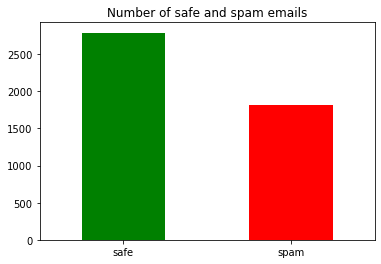

In [10]:
df.spam.value_counts().plot(kind='bar', color=['green','red'])
plt.xticks([0,1],['safe','spam'],rotation=0)
plt.title('Number of safe and spam emails')
plt.axis()
plt.show()

### Scatterplot

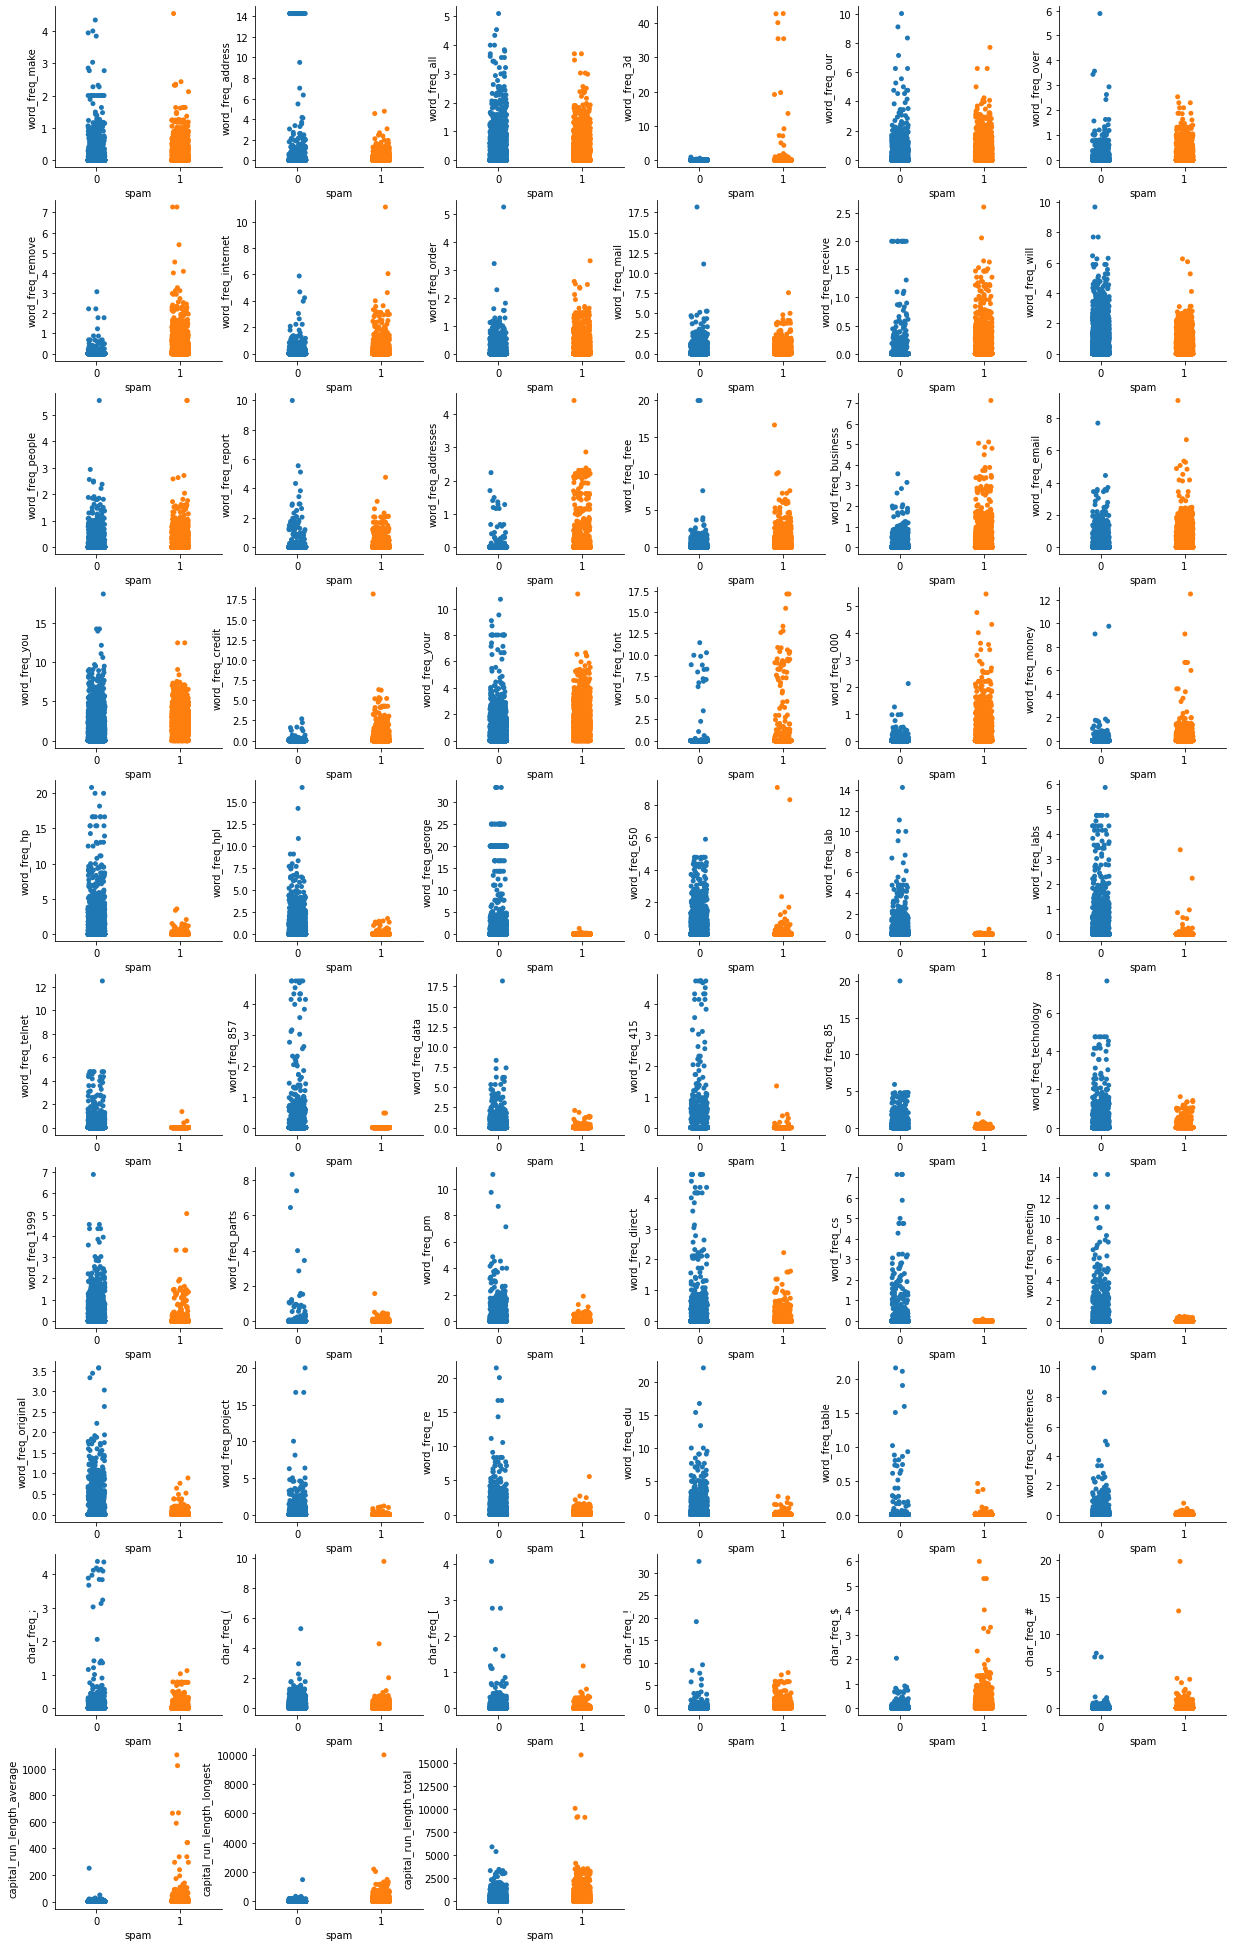

In [11]:
fig_, axes = plt.subplots(figsize=(21, 35), ncols=6, nrows=10)
for i in range(df.shape[1]-1):
    sns.stripplot(ax=axes[i//6,i%6], x='spam', y=df.columns[i], data=df)
    axes[i//6,i%6].spines['right'].set_visible(False)
    axes[i//6,i%6].spines['top'].set_visible(False)
fig_.delaxes(axes[9,3])
fig_.delaxes(axes[9,4])
fig_.delaxes(axes[9,5])

### Boxplot

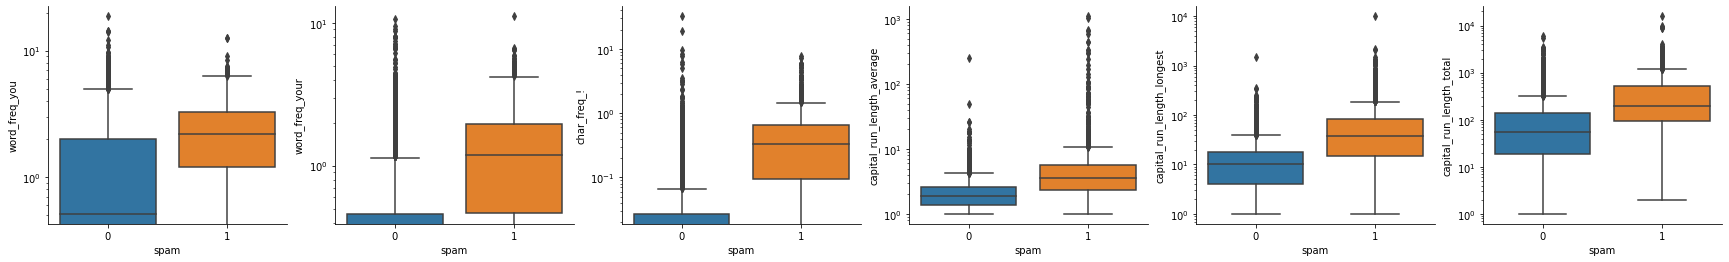

In [12]:
fig_, axes = plt.subplots(figsize=(30, 4), ncols=6, nrows=1)
boxplot_selected = ['word_freq_you','word_freq_your','char_freq_!','capital_run_length_average',
                    'capital_run_length_longest','capital_run_length_total']
for i in range(6):
    sns.boxplot(ax=axes[i], x='spam', y=boxplot_selected[i], data=df)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set(yscale="log")

### Barplot

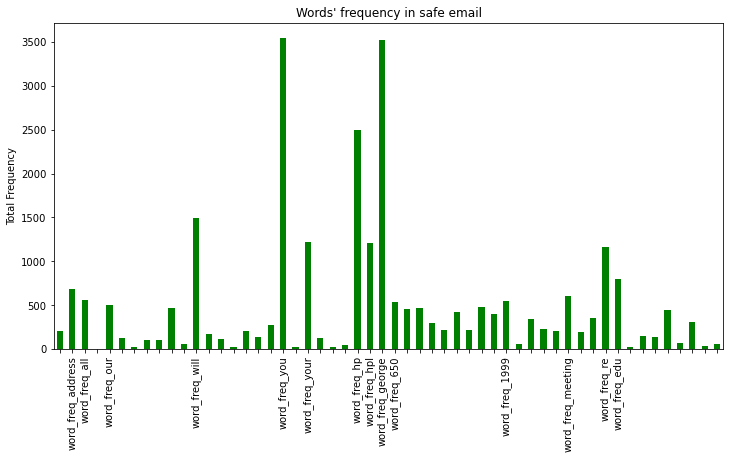

In [13]:
fig = plt.figure(figsize=(12,6))
df[df['spam']==0].iloc[:,:54].sum().plot(kind='bar', color='green')
plt.title("Words' frequency in safe email")
x_ticks_label =[x if df[df['spam']==0].loc[:,x].sum() > 500 else None for x in df.columns[:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54),x_ticks_label)
plt.show()

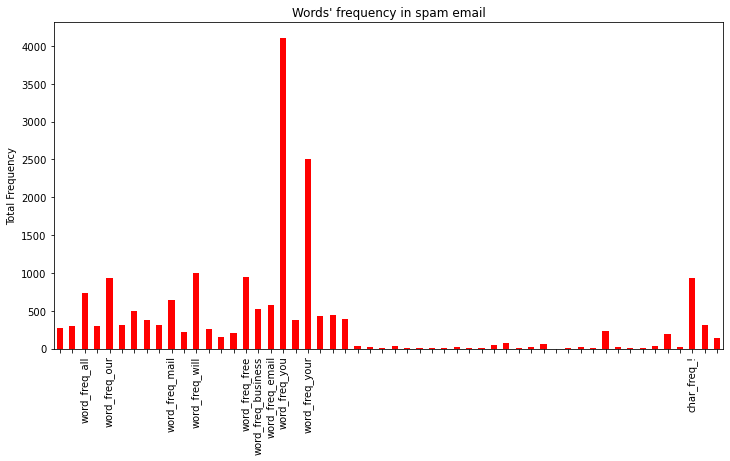

In [14]:
fig = plt.figure(figsize=(12,6))
df[df['spam']==1].iloc[:,:54].sum().plot(kind='bar', color='red')
plt.title("Words' frequency in spam email")
x_ticks_label =[x if df[df['spam']==1].loc[:,x].sum() > 500 else None for x in df.columns[:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54),x_ticks_label)
plt.show()

### Correlation 

In [15]:
correlation_matrix = df.corr()

<AxesSubplot:>

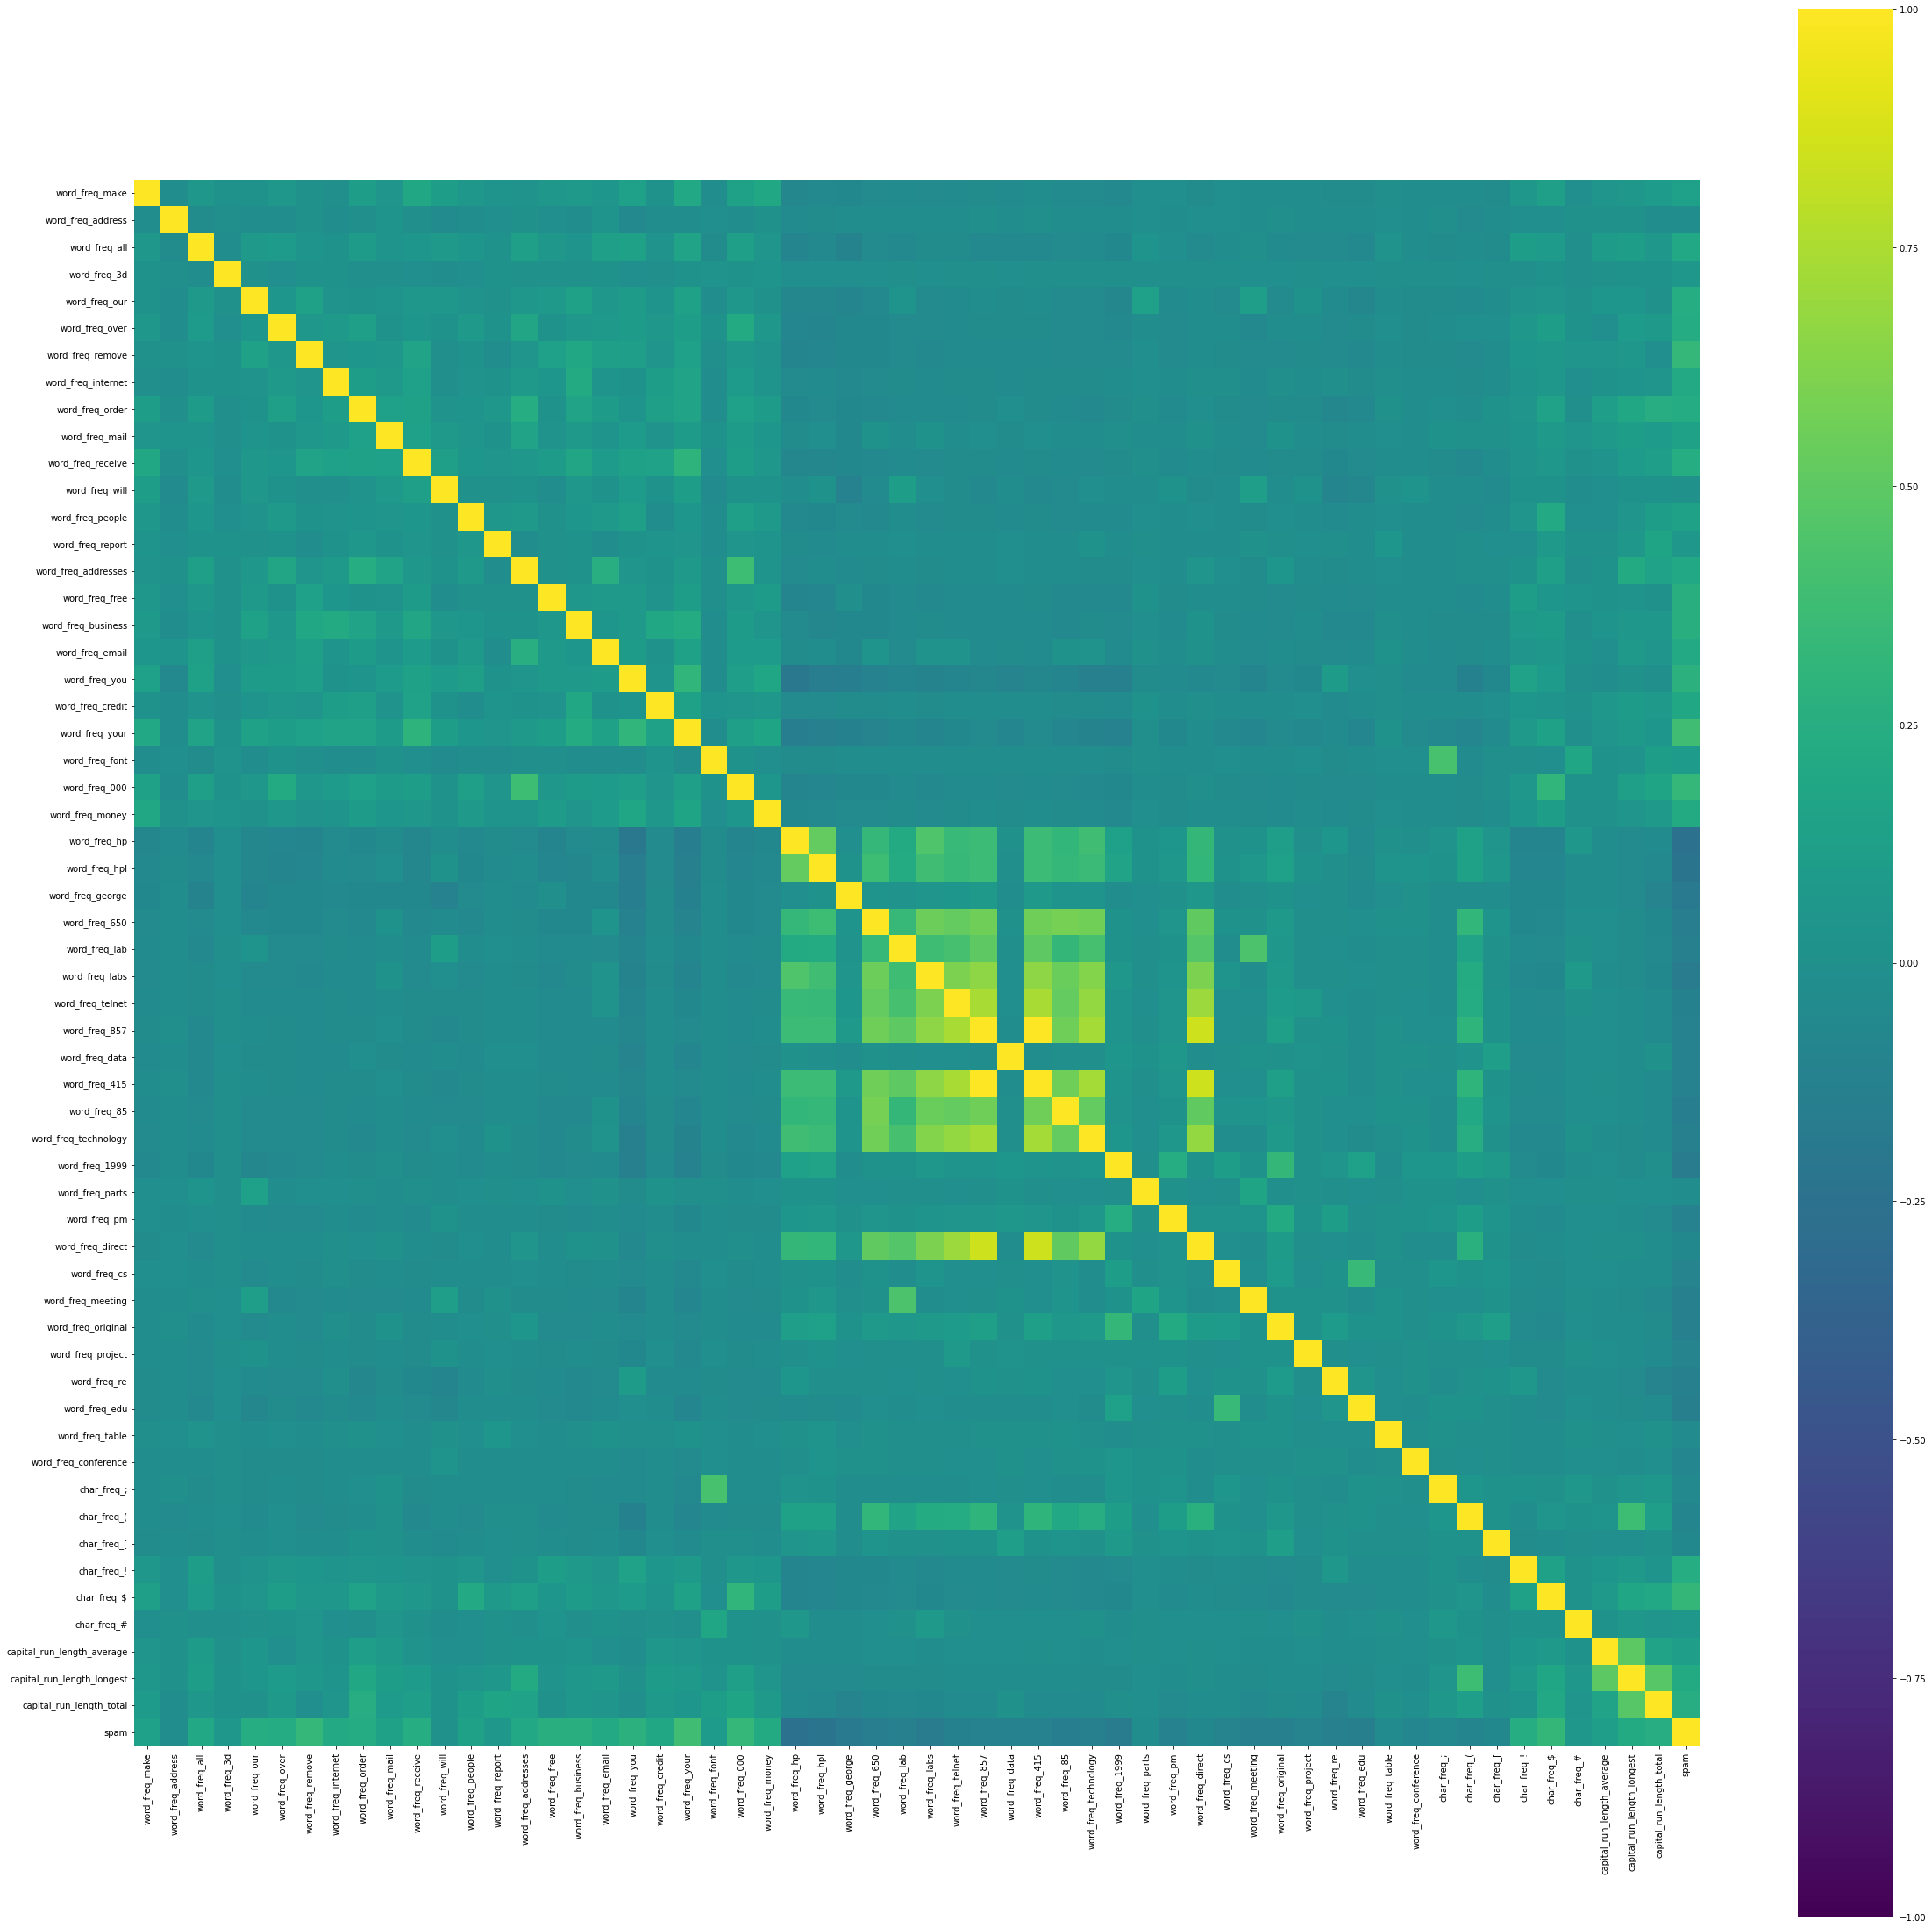

In [16]:
fig = plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cmap ="viridis", vmin=-1, square=True,)

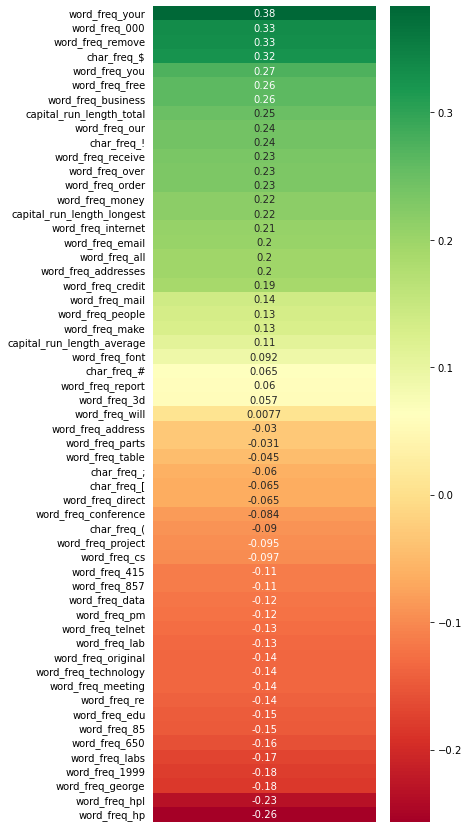

In [17]:
fig = plt.figure(figsize=(5,15))
corr_spam = correlation_matrix.spam.sort_values(ascending=False)
corr_spam.drop('spam',inplace=True)
ax = sns.heatmap(corr_spam.values.reshape((-1,1)), cmap ='RdYlGn', annot=True, 
                 xticklabels=False, yticklabels=corr_spam.index)
ax.tick_params(left=False)

In [18]:
threshold = 0.11
selected_features = corr_spam[(corr_spam < -threshold) | (corr_spam > threshold)].index
len(selected_features)

41

## Preprocessing Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('spam', axis=1).copy()
Y = df.spam.copy()
print(X.shape)
print(Y.shape)

(4601, 57)
(4601,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=10)
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X[selected_features],Y, random_state=10)
print('Training set with all attributes: {}'.format(X_train.shape))
print('Testing set with all attributes: {}\n'.format(X_test.shape))
print('Training set with selected attributes: {}'.format(X_train_s.shape))
print('Testing set with selected attributes: {}\n'.format(X_test_s.shape))
print('Training set with target value: {}'.format(Y_train.shape))
print('Testing set with target value: {}'.format(Y_test.shape))

Training set with all attributes: (3450, 57)
Testing set with all attributes: (1151, 57)

Training set with selected attributes: (3450, 41)
Testing set with selected attributes: (1151, 41)

Training set with target value: (3450,)
Testing set with target value: (1151,)


## Machine Learning models

In [22]:
from sklearn.metrics import accuracy_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from keras.models import Sequential
from keras.layers.core import Dense, Activation



Using TensorFlow backend.
/Users/ahmed/opt/anaconda3/envs/new2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ahmed/opt/anaconda3/envs/new2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ahmed/opt/anaconda3/envs/new2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ahmed/o

In [23]:
list_models_name = []
list_models = []
list_precision = {'all' : [], 'selected' : []}
list_accuracy = {'all' : [], 'selected' : []}

### Logistic Regression

In [24]:
lr_model = LogisticRegression(max_iter= 2000, random_state=10)
lr_model_s = LogisticRegression(max_iter= 2000, random_state=10)

In [25]:
lr_model.fit(X_train, Y_train)
lr_model_s.fit(X_train_s, Y_train_s)

LogisticRegression(max_iter=2000, random_state=10)

In [26]:
print(lr_model.score(X_train, Y_train))
print(lr_model.score(X_test, Y_test))
print(lr_model_s.score(X_train_s, Y_train))
print(lr_model_s.score(X_test_s, Y_test))

0.9269565217391305
0.9348392701998263
0.9202898550724637
0.9261511728931364


In [27]:
print(precision_score(Y_test,lr_model.predict(X_test)))
print(precision_score(Y_test,lr_model_s.predict(X_test_s)))

0.9282511210762332
0.9285714285714286


In [28]:
list_models_name.append('Logistic Regression')
list_models.append(lr_model)

### Decision Tree

In [29]:
random_model = DecisionTreeClassifier(random_state=10)
list_models_name.append('Desision Tree')
list_models.append(random_model)

### Random Forest

In [30]:
random_model = RandomForestClassifier(random_state=10)
list_models_name.append('Random Forest')
list_models.append(random_model)

In [31]:
random_model.fit(X_train, Y_train)
precision_score(Y_test,random_model.predict(X_test))

0.9575892857142857

### Gradient Boosting

In [32]:
boosting_model = GradientBoostingClassifier(random_state=10)
list_models_name.append('Gradient Boosting')
list_models.append(boosting_model)

### SVC

In [33]:
svc_model = SVC(random_state=10)
list_models_name.append('SVC')
list_models.append(svc_model)

## Fitting and computation

In [34]:
for model in list_models:
    model.fit(X_train, Y_train)
    list_accuracy['all'].append(model.score(X_test, Y_test))
    list_precision['all'].append(precision_score(Y_test,model.predict(X_test)))
    
    model.fit(X_train_s, Y_train)
    list_accuracy['selected'].append(model.score(X_test_s, Y_test))
    list_precision['selected'].append(precision_score(Y_test,model.predict(X_test_s)))

In [35]:
for i in range(len(list_models)):
    print(list_models_name[i])
    print('Accuracy -> all : {} vs selected : {}'.format(list_accuracy['all'][i],list_accuracy['selected'][i]))
    print('Precision -> all : {} vs selected : {}'.format(list_precision['all'][i],list_precision['selected'][i]))
    print()

Logistic Regression
Accuracy -> all : 0.9348392701998263 vs selected : 0.9261511728931364
Precision -> all : 0.9282511210762332 vs selected : 0.9285714285714286

Desision Tree
Accuracy -> all : 0.9226759339704604 vs selected : 0.9157254561251086
Precision -> all : 0.9088888888888889 vs selected : 0.8964757709251101

Random Forest
Accuracy -> all : 0.9591659426585578 vs selected : 0.9609035621198957
Precision -> all : 0.9575892857142857 vs selected : 0.963963963963964

Gradient Boosting
Accuracy -> all : 0.9574283231972198 vs selected : 0.9530842745438749
Precision -> all : 0.9615384615384616 vs selected : 0.9548532731376975

SVC
Accuracy -> all : 0.7193744569939183 vs selected : 0.7185056472632494
Precision -> all : 0.7445255474452555 vs selected : 0.7435897435897436



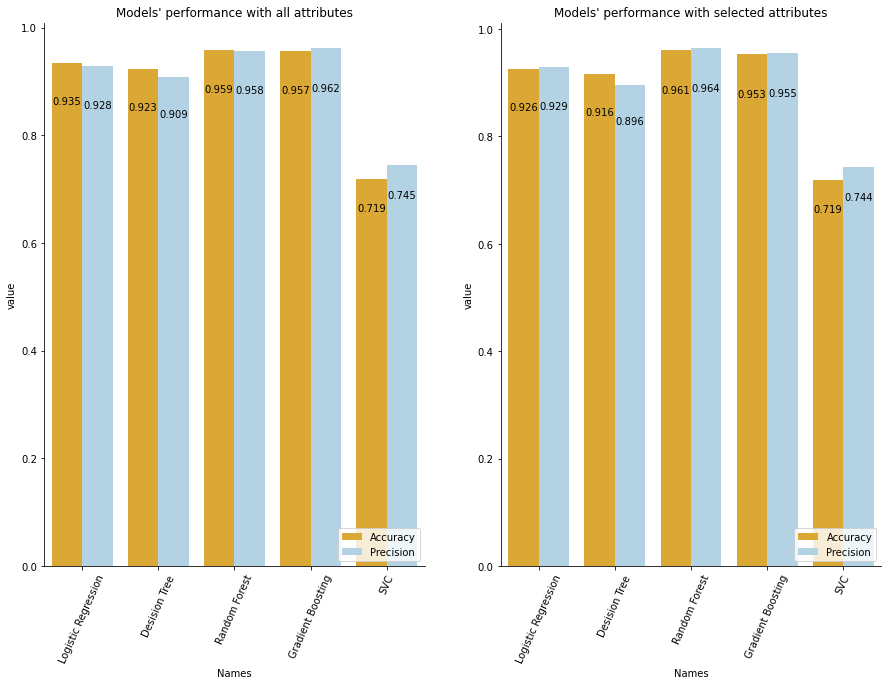

In [36]:
df_plot_1 = pd.DataFrame(data=zip(list_models_name,list_accuracy['all'], list_precision['all']), 
                         columns = ['Names','Accuracy','Precision'])
df_plot_2 = pd.DataFrame(data=zip(list_models_name, list_accuracy['selected'], list_precision['selected']),
                         columns = ['Names','Accuracy','Precision'])

flatui = ["#f8b319","#ABD5ED"]

fig, axes = plt.subplots(figsize=(15, 10), ncols=2, nrows=1)
sns.barplot(x='Names', y='value', hue='variable', data=df_plot_1.melt(id_vars='Names'), ax=axes[0], palette = flatui)
sns.barplot(x='Names', y='value', hue='variable', data=df_plot_2.melt(id_vars='Names'), ax=axes[1], palette = flatui)

axes[0].set_title("Models' performance with all attributes")
axes[1].set_title("Models' performance with selected attributes")

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticklabels(labels =list_models_name, rotation = 66)
    ax.legend(loc='lower right')
    
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + (p.get_width()/2), h*2.75/3, '{}'.format(round(h,3)), ha='center', color='black')

### Random Forest Confusion Matrix


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

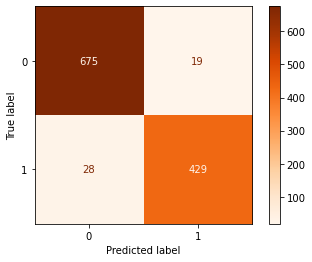

In [38]:
random_model.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, random_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot(cmap='Oranges')